## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





Frequenza per 10 lanci: 50.00%
Frequenza per 210 lanci: 57.14%
Frequenza per 410 lanci: 50.00%
Frequenza per 610 lanci: 52.30%
Frequenza per 810 lanci: 50.25%
Frequenza per 1010 lanci: 51.29%
Frequenza per 1210 lanci: 50.17%
Frequenza per 1410 lanci: 52.55%
Frequenza per 1610 lanci: 51.12%
Frequenza per 1810 lanci: 52.43%
Frequenza per 2010 lanci: 48.51%
Frequenza per 2210 lanci: 51.27%
Frequenza per 2410 lanci: 50.33%
Frequenza per 2610 lanci: 49.27%
Frequenza per 2810 lanci: 50.50%
Frequenza per 3010 lanci: 51.20%
Frequenza per 3210 lanci: 50.12%
Frequenza per 3410 lanci: 50.47%
Frequenza per 3610 lanci: 49.14%
Frequenza per 3810 lanci: 49.48%
Frequenza per 4010 lanci: 50.30%
Frequenza per 4210 lanci: 49.79%
Frequenza per 4410 lanci: 50.07%
Frequenza per 4610 lanci: 48.48%
Frequenza per 4810 lanci: 48.71%
Frequenza per 5010 lanci: 50.74%
Frequenza per 5210 lanci: 49.40%
Frequenza per 5410 lanci: 50.39%
Frequenza per 5610 lanci: 50.45%
Frequenza per 5810 lanci: 50.03%
Frequenza per 60

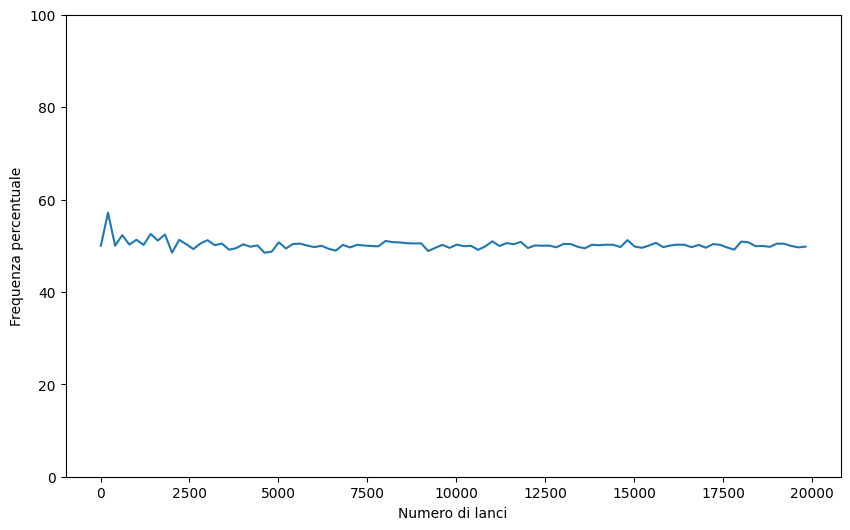

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
def throw_coin(n):
    results = np.random.choice(['H', 'T'], size=n, p=[0.5, 0.5])
    resultsSeries = pd.Series(results)
    heads = resultsSeries.value_counts(normalize=True).get('H', 0) * 100
    # print(f"Frequenza % di teste: {heads:.2f}%")
    return heads

# Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
frequencies = np.array([], dtype=np.float64)
start = 10
end = 20000
step = 200
for n in range(start, end, step):
    heads = throw_coin(n)
    frequencies = np.append(frequencies, heads)
for index, value in enumerate(frequencies):
    print(f"Frequenza per {10 + index * 200} lanci: {value:.2f}%")

print(frequencies)
# Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)
plt.figure(figsize=(10, 6))
plt.plot(range(start, end, step), frequencies)
plt.xlabel('Numero di lanci')
plt.ylabel('Frequenza percentuale')
plt.ylim(0, 100)
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

Righe: 714 | Colonne: 12
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 529
Embarked: 0
Valori duplicati: 0


(Pclass
 1    38.233441
 2    29.877630
 3    25.140620
 Name: Age, dtype: float64,
      PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 885          886         0       3   
 886          887         0       2   
 887          888         1       1   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. Will

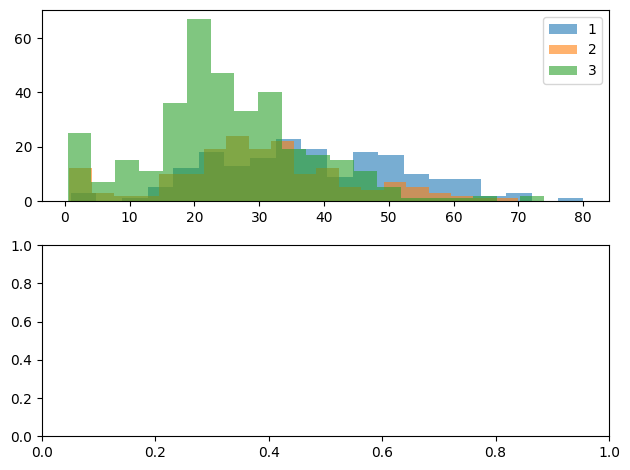

In [ ]:
print(f"Righe: {df.shape[0]} | Colonne: {df.shape[1]}")
for col in df.columns:
    print(f"{col}: {sum(df[col].isna())}")

EmbarkedMode = df["Embarked"].notna().mode()
df.fillna({"Embarked": df["Embarked"].dropna().mode()[0]}, inplace=True)
df = df.dropna(subset=["Age"])
print(f"Valori duplicati: {df.duplicated().sum()}")

mean_ages = df.groupby("Pclass")["Age"].mean()

fig, ax = plt.subplots(2, 1)
for pclass in sorted(df["Pclass"].unique()):
    subset = df[df["Pclass"] == pclass]
    ax[0].hist(subset["Age"].dropna(), bins=20, alpha=0.6,
             label=f"{pclass}")
ax[0].legend()

ax[1] 
plt.tight_layout()

mean_ages, df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()